<a href="https://colab.research.google.com/github/andrew-veriga/MathForML/blob/master/CoffieCircles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load libs

In [2]:
import tensorflow as tf
import numpy as np

### Load picture

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
img_import = drive.CreateFile({'id':'1Nho1Ed_TnlSzTkJ0v0pc9dfvQH-HOws9'})
img_import.GetContentFile('sample.png') 

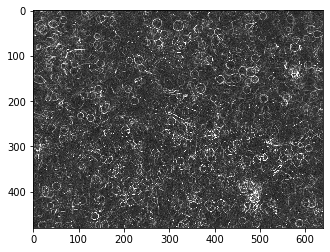

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path='https://drive.google.com/open?id=1OXsu5J4iI33WlAkMPMX2JwIHiN64YPMj'
#img_path='https://drive.google.com/file/d/1Nho1Ed_TnlSzTkJ0v0pc9dfvQH-HOws9/view?usp=sharing'
#img_path='https://www.dropbox.com/s/8naq7w6w2egpl6t/CoffieCircles.png?dl=0'
Image = mpimg.imread('sample.png')
plt.imshow(Image)


In [5]:
print(Image.shape)

(480, 640, 4)


###Prepare picture
Convert Image to 2D

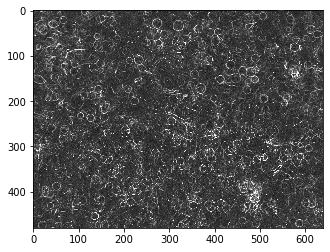

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Image = rgb2gray(Image)    
plt.imshow(Image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [7]:
print (Image.shape)

(480, 640)


###Init variables

`MaxSize` - max size of square region

`MinSize` - min size of square region

`Contrast` - scalar set contrast of recognizing ring 
`Thick` - thickness of ring
`FoundCircles` - numpy array of centers and radiuces (3,None)

In [0]:
firstX=1
firstY=1
MaxSize = Image.shape[0]//12
MinSize = 10
Contrast = .18
Variance = 0.03
Thick = .8
FoundCircles = np.array([[],[]],dtype=np.int32)
_DEBUG_=False

In [0]:
# from scipy.spatial import distance
# for i in range(0,a.shape[0]):
#   d = [np.sum((a[i]-a[j])**2) for j in range(i+1,a.shape[0])] 
#   print(d) 

###function isCircleFound
calculate average brightness over all pixels of current square;
If pixels of SelectedRing have avg brightness more then avg brightness over all square - circle is found 


In [0]:
#from scipy.special import softmax

def isCircleFound(_box, _mask):
  
  brightness = (lambda arr: np.average(arr-np.min(_box)))#/(np.max(arr)-np.min(box))))
  if _DEBUG_:
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
  if ((brightness(_box[_mask]) - brightness(_box[~_mask])) > Contrast and np.var(_box[_mask]) < Variance):
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
    print(np.var(_box[_mask]))
    return True
  else:
    return False
  

###function getMask
create square matrix of boolean as a ring of Trues inscribed in a square of Falses 

False


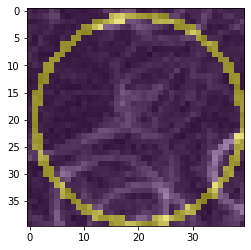

In [12]:
import itertools

def getMask( size, thick = 1 ):
    radius = size //2 - 1
    center = np.array([size/2,size/2])
    vectors = [[(i,j) for j in range(size)] for i in range(size)]
    l = itertools.chain.from_iterable(zip(*vectors))
    
    # list of pairs (x,y) belong of ring
    selectedVecs = np.array(list(filter(lambda v: np.abs(np.linalg.norm(v - center) - radius) < thick,l)))
    
    #ring mask
    ring = np.array(np.zeros((size,size),dtype=np.bool))
    for (i,j) in (selectedVecs):
      ring[i,j]=True
    
    return ring

Mask = getMask( MaxSize, .8 )
square = Image[firstY:firstY+MaxSize, firstX:firstX+MaxSize]
    
#ring visualisation
fig, ax = plt.subplots()
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
ax.imshow(getMask( MaxSize, .8 ),alpha=.5)
fig.show()
print (isCircleFound(square, Mask))

##An example of founded ring

0.3417305408910848
0.1485386705542594
0.3417305408910848
0.1485386705542594
0.022079053024076818
True
0.022079053024076818


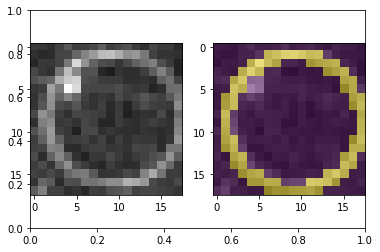

In [34]:
#SquareSize=20, (x,y)= 57, 13

x=57
y=13
size=18
Mask = getMask( size, Thick )
square = Image[y:y+size, x:x+size]
    
#ring visualisation
fig, ax = plt.subplots()
ax = fig.add_subplot(1,2,1)
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

ax1=fig.add_subplot(1,2,2)
ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
ax1.imshow(Mask,alpha=.5)
fig.show()
_DEBUG_=True
print(isCircleFound(square, Mask))
print(np.var(square[Mask]))
_DEBUG_=False

### one row of rings

### function LFCR
ring move to the first position and down to n pixels


size 10
0.37006103901620957
0.17449235459182633
0.01912127258248002
[(619, 441), 10]
size 11
size 12
0.37901736150383947
0.17210043576389547
0.010094758152191782
[(5, 74), 12]
0.41778353532515466
0.19943103800877926
0.02068542642386552
[(5, 75), 12]
0.32412089384905995
0.1243405112103
0.022925018243083847
[(519, 143), 12]
size 13
0.36904806439094245
0.172028129136453
0.02516994629136203
[(4, 74), 13]
0.3908759484227747
0.16807097784880928
0.01575616844866948
[(5, 74), 13]
size 14
size 15
size 16
0.44413451259071013
0.22887825516674198
0.02697280673331848
[(60, 116), 16]
0.37680055997490414
0.1710613282330334
0.01622018927163343
[(606, 125), 16]
0.4399069925978779
0.23876288824975486
0.025250079797791508
[(551, 184), 16]
0.3775357863395009
0.19211723159342076
0.025268144226432192
[(29, 223), 16]
size 17
0.41929358530826866
0.2376377523823542
0.026562386076215885
[(551, 183), 17]
size 18
0.36628691210310904
0.1202226333995487
0.02037220226743341
[(498, 4), 18]
0.354572396791745
0.1264900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[(39, 139), 18]
0.34246575677935037
0.1619895855183423
0.02128791676319817
[(200, 164), 18]
0.34976895292164756
0.12853102569307093
0.02033634155949466
[(215, 191), 18]
0.34525959894552827
0.14387825486149455
0.02225118257418058
[(506, 223), 18]
size 19
0.3538861908527357
0.12573245862248733
0.024125043620515516
[(498, 3), 19]
0.34571707262833207
0.12287297248730322
0.025600722430477434
[(498, 4), 19]
0.3699443399144602
0.13545754238196547
0.015735303662974175
[(57, 12), 19]
0.32886534863779593
0.14850925682287944
0.024852421868838667
[(382, 39), 19]
0.4068687507199389
0.15520498211384895
0.029189021366077653
[(139, 108), 19]
0.3823147173283888
0.1881740076248665
0.020248418438449604
[(597, 111), 19]
0.3895035397198051
0.15763979021277183
0.020629819171175283
[(80, 125), 19]
0.3522056808977787
0.1623112282523475
0.0261236133962449
[(80, 126), 19]
0.343803157729549
0.1369580589409662
0.028459243877031068
[(38, 138), 19]
0.3515988304206836
0.13501870452129022
0.023621476258708078
[(38, 1

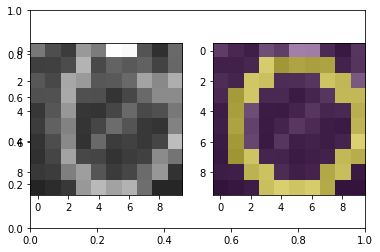

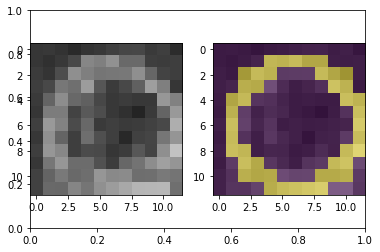

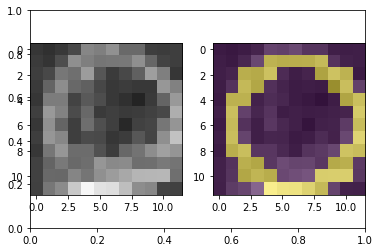

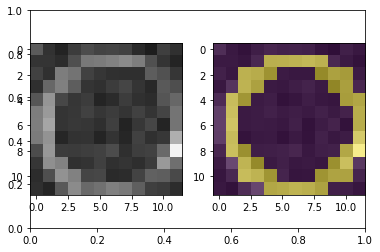

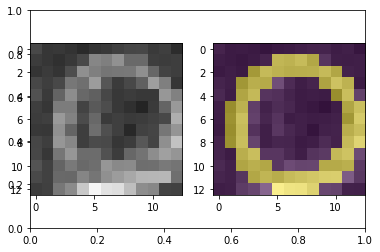

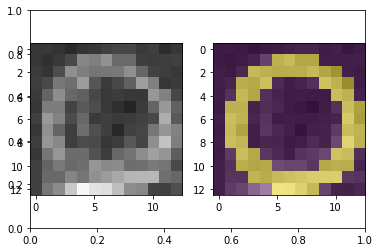

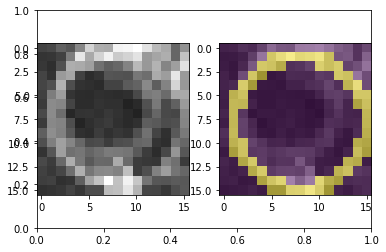

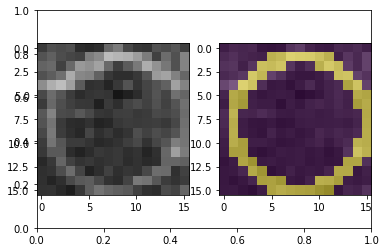

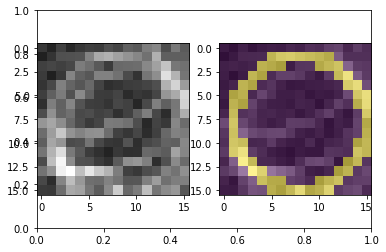

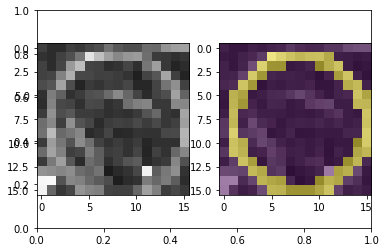

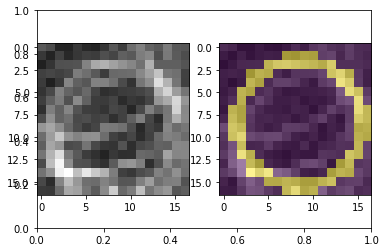

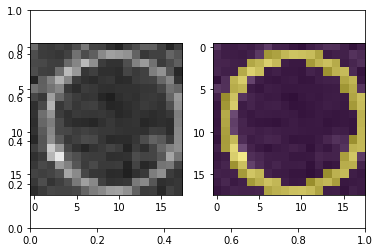

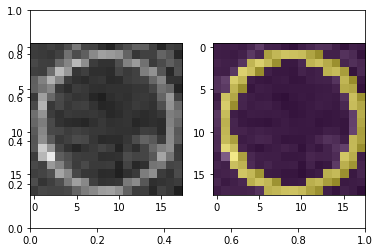

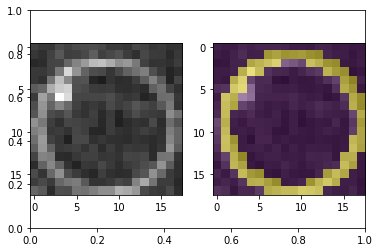

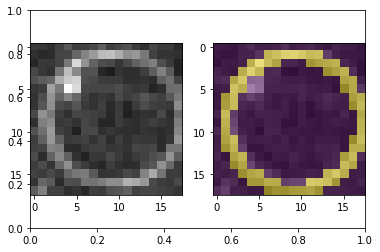

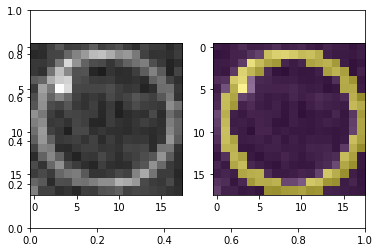

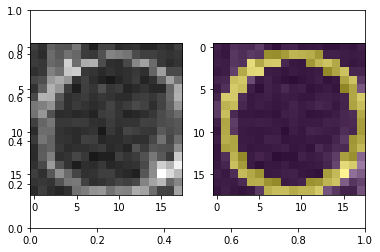

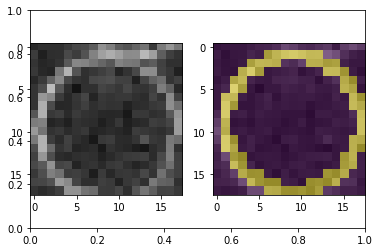

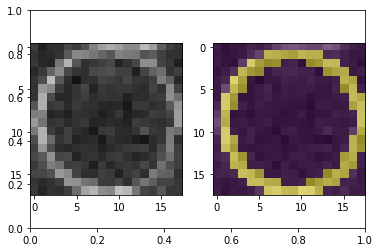

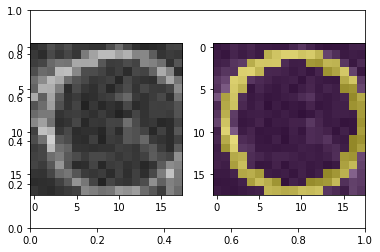

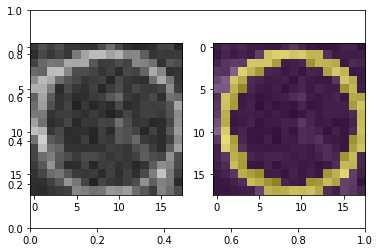

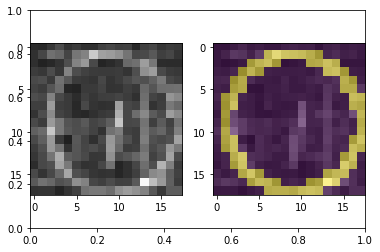

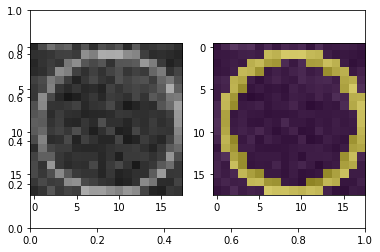

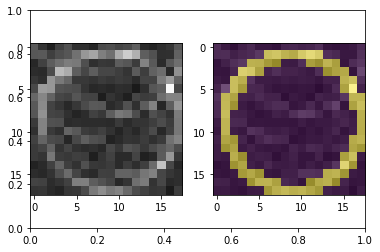

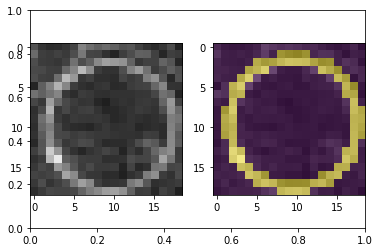

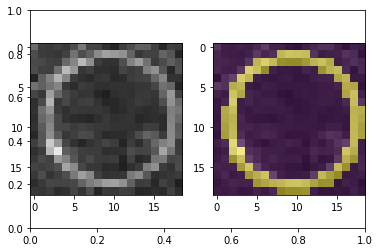

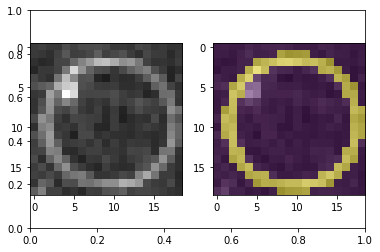

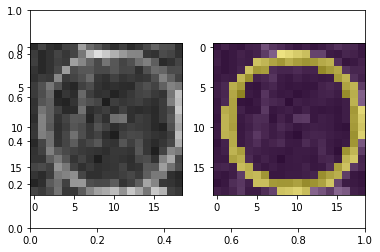

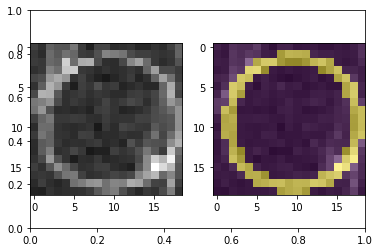

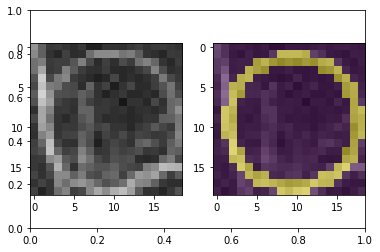

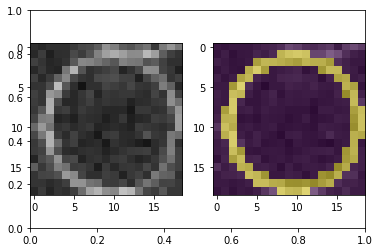

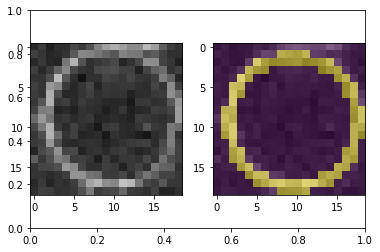

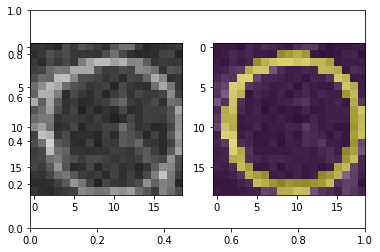

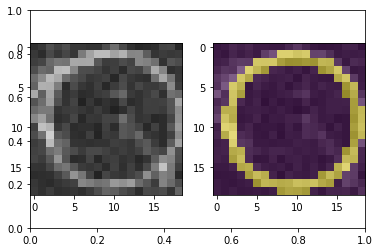

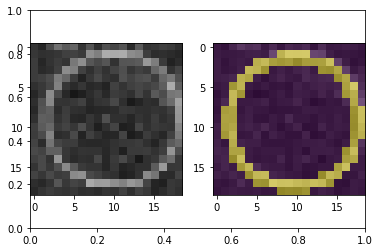

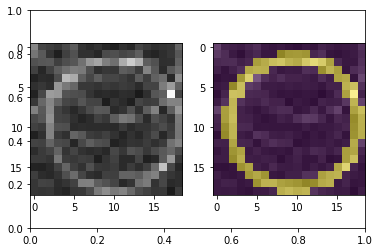

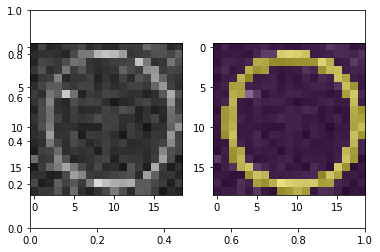

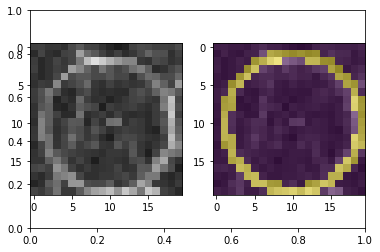

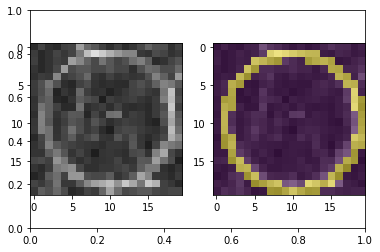

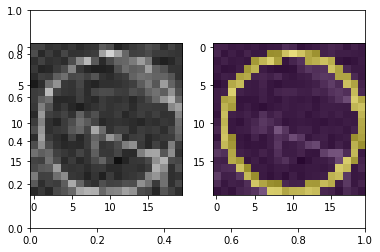

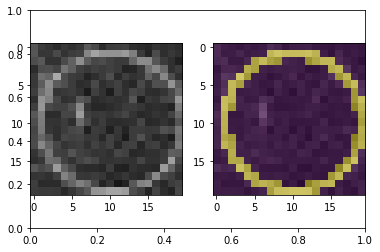

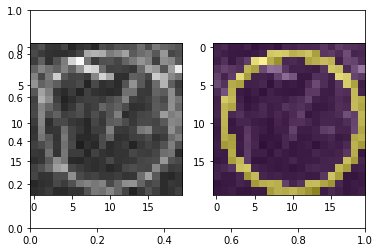

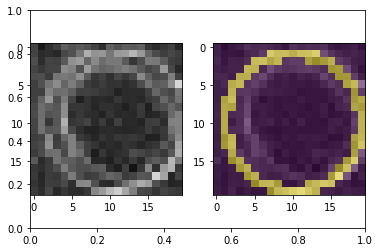

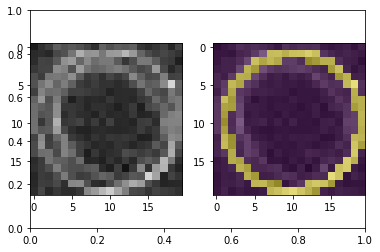

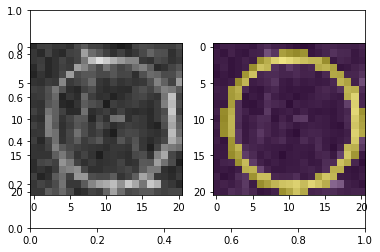

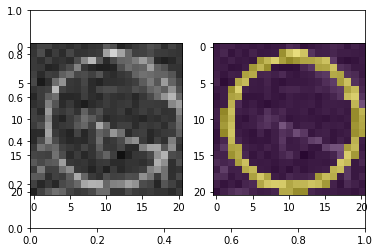

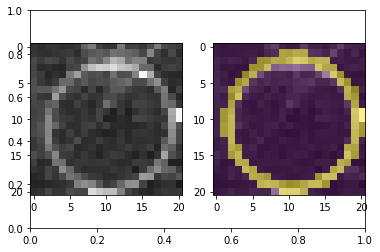

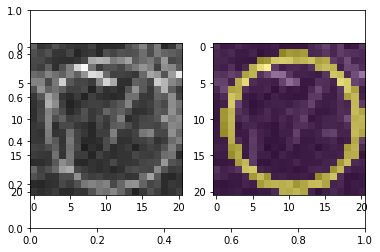

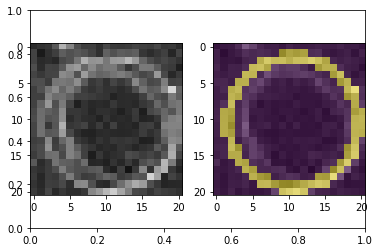

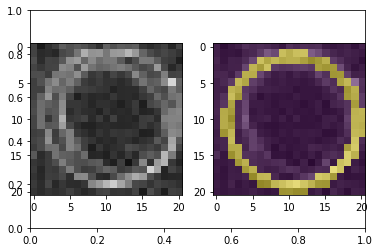

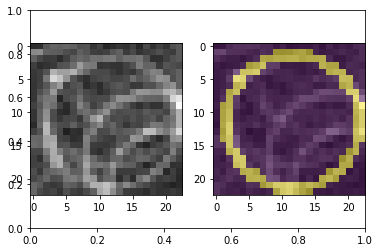

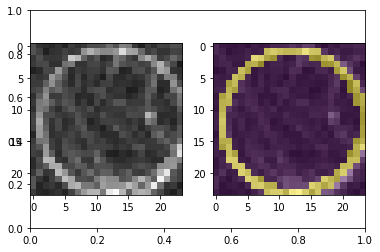

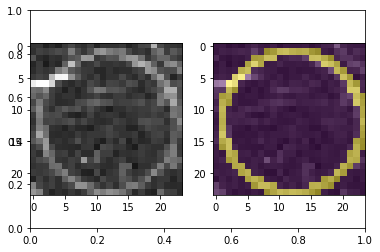

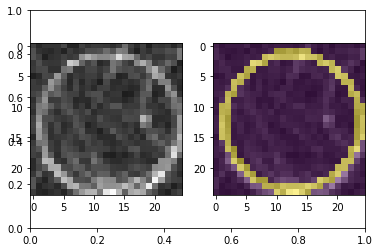

In [37]:
FoundCircles=np.array([[],[]],dtype=np.int32)
for size in range(MinSize,MaxSize+1):
  mask = getMask( size, Thick )
  print('size '+str(size))
  for y in range(0,Image.shape[0]-size):
    for x in range(0, Image.shape[1] - size):
      square = Image[y:y+size, x:x+size]
      if isCircleFound(square, mask):
        fig, ax = plt.subplots()
        ax = fig.add_subplot(1,2,1)
        ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        ax1=fig.add_subplot(1,2,2)
        ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        ax1.imshow(mask,alpha=.5)
        fig.show()
        print([(x,y),size])
        np.append(FoundCircles, [(x,y),size])


    

In [41]:
FoundCircles

array([], shape=(2, 0), dtype=int32)

In [17]:
#[(30, 101), 40]
y=101
x=30
size = 40
square = Image[y:y+size, x:x+size]
mask = getMask( size, Thick )
arr = square[mask]
box = square
st = (lambda arr: np.mean((arr-np.min(arr))))
print (st(box[mask]))
print (st(box[~mask]))
print(np.var(box[mask]))


0.28207442110222863
0.1983998725808608
0.05047860578110671
0.05047860578110671


###Iterate over all possible positions for single radius

### Loop over all radiuses from MaxSize to MinSize